<a href="https://colab.research.google.com/github/ebonysamlac/dosar/blob/master/Discriminant%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PART 2 : PRACTICAL APPLICATION**

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving auto.txt to auto.txt
Saving x_test.csv to x_test.csv
Saving x_train.csv to x_train.csv
Saving y_test.csv to y_test.csv
Saving y_train.csv to y_train.csv


In [ ]:
auto=pd.read_csv("auto.txt", sep=";")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Our dataset contains 8 features which are numerical variables and one class denoted name

In [ ]:
#In this part, we create a new variable denoted mpg_median in which we store the median of the column mgp
mpg_median = auto["mpg"].median()

#We create the column mpg01 which contains only 1 or 0
mpg01 = pd.get_dummies(auto["mpg"] > mpg_median,drop_first=True)

#We add the column mpg01 to our dataset auto
auto['mpg01'] = mpg01
print (auto)

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0         130    3504          12.0    70   
1    15.0          8         350.0         165    3693          11.5    70   
2    18.0          8         318.0         150    3436          11.0    70   
3    16.0          8         304.0         150    3433          12.0    70   
4    17.0          8         302.0         140    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
295  38.0          6         262.0          85    3015          17.0    82   
296  32.0          4         144.0          96    2665          13.9    82   
297  36.0          4         135.0          84    2370          13.0    82   
298  27.0          4         151.0          90    2950          17.3    82   
299  32.0          4         135.0          84    2295          11.6    82   

     origin                               name  mpg01  
0      

In [ ]:
#Description of our data
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000
mean,23.699333,5.433333,192.338333,104.050000,2945.846667,15.460000,75.93000,1.616667,0.500000
std,7.963814,1.717183,105.453661,38.959127,849.694403,2.729389,3.67015,0.827853,0.500835
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.00000,1.000000,0.000000
25%,17.000000,4.000000,98.000000,75.000000,2212.500000,13.500000,73.00000,1.000000,0.000000
50%,23.600000,4.000000,140.000000,91.500000,2730.000000,15.400000,76.00000,1.000000,0.500000
75%,29.925000,8.000000,275.750000,129.000000,3526.250000,17.000000,79.00000,2.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,23.500000,82.00000,3.000000,1.000000


We have a dataset containing 300 observation. For the features displacement, weight, and horsepower have dispersed data as there is much variance in their data. They are scattered around the mean in contrast to cylinders, origin and mpg01.


In [ ]:
df = pd.DataFrame(auto)
print('The median of mpg is : ')
df['mpg'].median()

The median of mpg is : 


23.6

In [ ]:


# Dataset is now stored in a Pandas Dataframe

In [ ]:
x_test =pd.read_csv("x_test.csv", sep=",")
df_x_test = pd.DataFrame(x_test)
x_test = df_x_test.drop(columns=df_x_test.columns[0], axis=1)
print(x_test.head())
print(len(x_test.index))


   cylinders  displacement  horsepower  weight
0          4         119.0          97    2405
1          4          98.0          66    1800
2          6         200.0          85    2587
3          8         302.0         129    3725
4          6         225.0          90    3381
60


Our dataset contains 60 observations

In [ ]:
x_train = pd.read_csv("x_train.csv", sep=",")
df_x_train = pd.DataFrame(x_train)
x_train = df_x_train.drop(columns=df_x_train.columns[0], axis=1)
print(x_train.head())
print(len(x_train.index))

   cylinders  displacement  horsepower  weight
0          4         115.0          95    2694
1          6         250.0         105    3353
2          4          97.0          92    2288
3          4          91.0          67    1965
4          4         151.0          90    2735
240


The x_train set contains 240 observations

In [ ]:
y_test = pd.read_csv("y_test.csv", sep=",")
df_y_test = pd.DataFrame(y_test)
y_test = df_y_test.drop(columns=df_y_test.columns[0], axis=1)
print(y_test.head())
print(len(y_test.index))

   mpg01
0      1
1      1
2      0
3      0
4      0
60


The y_test set contains 60 observations as the y_test set



In [ ]:
y_train = pd.read_csv("y_train.csv", sep=",")
df_y_train = pd.DataFrame(y_train)
y_train = df_y_train.drop(columns=df_y_train.columns[0], axis=1)
print(y_train)
print(len(y_train.index))

     mpg01
0        0
1        0
2        1
3        1
4        1
..     ...
235      1
236      0
237      0
238      0
239      0

[240 rows x 1 columns]
240


the y_train set contains 240 observations as the x_train set

We can find the same results by using the function describe, the result is consigned in the row count of the table.

In [ ]:
# Observation in each dataset
x_train.describe()



,cylinders,displacement,horsepower,weight
count,240.000000,240.000000,240.000000,240.000000
mean,5.404167,188.852083,102.691667,2922.237500
std,1.711145,104.014100,37.949933,840.326569
min,3.000000,70.000000,46.000000,1613.000000
25%,4.000000,98.000000,75.000000,2199.000000
50%,4.000000,140.000000,90.000000,2718.000000
75%,8.000000,260.500000,122.750000,3440.500000
max,8.000000,455.000000,225.000000,4955.000000


In [ ]:
x_test.describe()


,cylinders,displacement,horsepower,weight
count,60.000000,60.000000,60.000000,60.000000
mean,5.550000,206.283333,109.483333,3040.283333
std,1.750787,110.829858,42.666421,887.137581
min,3.000000,68.000000,48.000000,1795.000000
25%,4.000000,108.750000,84.750000,2322.500000
50%,5.000000,159.500000,96.500000,2810.000000
75%,8.000000,304.000000,139.000000,3732.500000
max,8.000000,454.000000,230.000000,4997.000000


In [ ]:
y_train.describe()


,mpg01
count,240.000000
mean,0.516667
std,0.500766
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
y_test.describe()

,mpg01
count,60.000000
mean,0.433333
std,0.499717
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
#Merging the 2 sets
auto_train = pd.concat([x_train, y_train], axis=1)

In [ ]:
auto_train.describe()


,cylinders,displacement,horsepower,weight,mpg01
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,5.404167,188.852083,102.691667,2922.237500,0.516667
std,1.711145,104.014100,37.949933,840.326569,0.500766
min,3.000000,70.000000,46.000000,1613.000000,0.000000
25%,4.000000,98.000000,75.000000,2199.000000,0.000000
50%,4.000000,140.000000,90.000000,2718.000000,1.000000
75%,8.000000,260.500000,122.750000,3440.500000,1.000000
max,8.000000,455.000000,225.000000,4955.000000,1.000000


In [ ]:
#Perform logistic regression to predict mpg01
formula = 'mpg01 ~ cylinders + weight + displacement + horsepower'
model = smf.glm(formula = formula , data=auto_train , family = sm.families.Binomial())
logreg = model.fit()
print(logreg.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  mpg01   No. Observations:                  240
Model:                            GLM   Df Residuals:                      235
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -61.605
Date:                Sat, 15 Oct 2022   Deviance:                       123.21
Time:                        23:55:00   Pearson chi2:                     275.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       11.2318      2.179      5.155   

Interpretation: the variables "weight" and "horsepower" are statistically significant because there p-value is less than 0.05.


In [ ]:
#Vector of estimated probalities
yhat_probs = logreg.fittedvalues
print(yhat_probs)

0      0.708781
1      0.060105
2      0.896964
3      0.981834
4      0.586649
         ...   
235    0.985506
236    0.072270
237    0.183025
238    0.000046
239    0.073163
Length: 240, dtype: float64


In [ ]:
yhat = [1 if x > 0.5 else 0 for x in yhat_probs]


In [ ]:
#Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score
print(confusion_matrix (y_train, yhat ))
print(accuracy_score(y_train, yhat ))
print(classification_report(y_train, yhat, digits=3))

[[102  14]
 [  9 115]]
0.9041666666666667
              precision    recall  f1-score   support

           0      0.919     0.879     0.899       116
           1      0.891     0.927     0.909       124

    accuracy                          0.904       240
   macro avg      0.905     0.903     0.904       240
weighted avg      0.905     0.904     0.904       240



In [ ]:
#Calcul of the train error rate 
from sklearn.metrics import mean_squared_error
training_error = mean_squared_error(y_train,yhat)
print(training_error)

0.09583333333333334


In [ ]:
#Confusion matrix and accuracy score for x_test
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
pred_prob = logreg.predict(x_test)
pred_xhat = [1 if x > 0.5 else 0 for x in pred_prob]
print(confusion_matrix (y_test, pred_xhat ))
print(accuracy_score(y_test, pred_xhat ))
print(classification_report(y_test, pred_xhat, digits=3))


[[27  7]
 [ 2 24]]
0.85
              precision    recall  f1-score   support

           0      0.931     0.794     0.857        34
           1      0.774     0.923     0.842        26

    accuracy                          0.850        60
   macro avg      0.853     0.859     0.850        60
weighted avg      0.863     0.850     0.851        60



In [ ]:
testing_error = mean_squared_error(y_test,pred_xhat)
print(testing_error)

0.15


**2.3 K-Nearest Neighbors**

We have to calculate the training error to choose the best value of K as we perform the KNN classifier for each value of K. The F1 score for each value of K is printed alongside.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import f1_score
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(x_train, np.ravel(y_train))
yhat_knn=neigh.predict(x_test)

# To calculate the F1 value of K
f1_score_k1 = f1_score(y_test, yhat_knn, average='weighted')
print ('KNN=1 F1 score is:', f1_score_k1)

#Let's calculate the test error
test_error = mean_squared_error(y_test,yhat_knn)
print(test_error)


KNN=1 F1 score is: 0.8671156004489338
0.13333333333333333


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, np.ravel(y_train))
yhat_knn3=neigh.predict(x_test)

# To calculate the F1 value of K
f1_score_k3 = f1_score(y_test, yhat_knn3, average='weighted')
print ('KNN=3 F1 score is:', f1_score_k3)

#Let's calculate the test error
test_error = mean_squared_error(y_test,yhat_knn3)
print(test_error)

KNN=3 F1 score is: 0.8838206627680312
0.11666666666666667


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, np.ravel(y_train))
yhat_knn5=neigh.predict(x_test)

# To calculate the F1 value of K
f1_score_k5 = f1_score(y_test, yhat_knn5, average='weighted')
print ('KNN=5 F1 score is:', f1_score_k5)

#Let's calculate the test error
test_error = mean_squared_error(y_test,yhat_knn5)
print(test_error)



KNN=5 F1 score is: 0.8338895068594735
0.16666666666666666


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=17)
neigh.fit(x_train, np.ravel(y_train))
yhat_knn17=neigh.predict(x_test)

# To calculate the F1 value of K
f1_score_k17 = f1_score(y_test, yhat_knn17, average='weighted')
print ('KNN=17 F1 score is:', f1_score_k17)

#Let's calculate the test error
test_error = mean_squared_error(y_test,yhat_knn17)
print(test_error)


KNN=17 F1 score is: 0.85062656641604
0.15


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=51)
neigh.fit(x_train, np.ravel(y_train))
yhat_knn51=neigh.predict(x_test)


# To calculate the F1 value of K
f1_score_k51 = f1_score(y_test, yhat_knn51, average='weighted')
print ('KNN=51 F1 score is:', f1_score_k51)

#Let's calculate the test error
test_error = mean_squared_error(y_test,yhat_knn51)
print(test_error)


KNN=51 F1 score is: 0.85062656641604
0.15


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=75)
neigh.fit(x_train, np.ravel(y_train))
yhat_knn75=neigh.predict(x_test)

# To calculate the F1 value of K
f1_score_k75 = f1_score(y_test, yhat_knn75, average='weighted')
print ('KNN=75 F1 score is:', f1_score_k75)

#Let's calculate the test error
test_error = mean_squared_error(y_test,yhat_knn)
print(test_error)


KNN=75 F1 score is: 0.834077380952381
0.13333333333333333


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=101)
neigh.fit(x_train, np.ravel(y_train))
yhat_knn101=neigh.predict(x_test)

# To calculate the F1 value of K
f1_score_k101 = f1_score(y_test, yhat_knn101, average='weighted')
print ('KNN=101 F1 score is:', f1_score_k101)

#Let's calculate the test error
test_error = mean_squared_error(y_test,yhat_knn)
print(test_error)


#print(confusion_matrix(yhat_knn101, y_test ))
#print(classification_report(yhat_knn101,y_test, digits=3))

KNN=101 F1 score is: 0.834077380952381
0.13333333333333333


Text(0, 0.5, 'F1 Score')

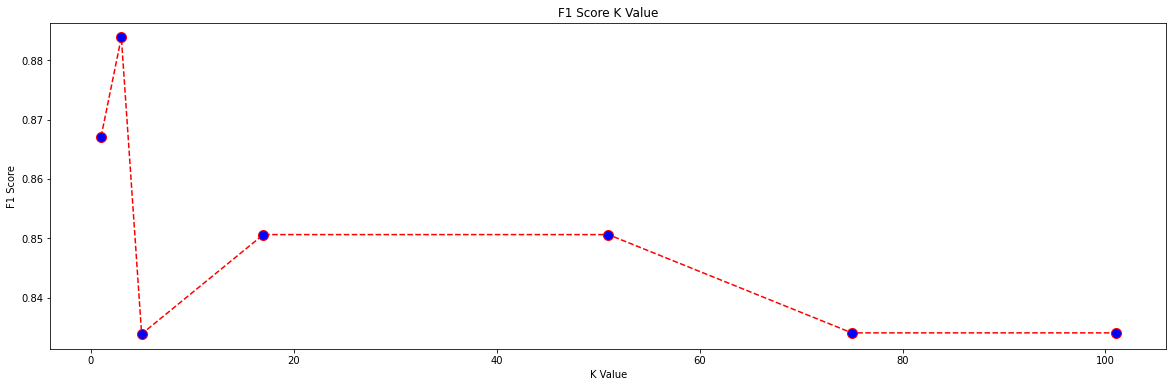

In [ ]:
import matplotlib.pyplot as plt 
f1s = []
k_values=[1,3,5,17,51,75,101]
# Calculating f1 score for K values between 1 and 101
for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, np.ravel(y_train))
    pred_i = knn.predict(x_test)
# using average='weighted' to calculate a weighted average for the 2 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))
plt.figure(figsize=(20, 6))
plt.plot(k_values, f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

We choose K=3  Because this parameter allows us to find the best classifier with the less error rate which is 11.66% .

In [ ]:
#We can now calculate the performance indicators for K= 3
print(confusion_matrix(y_test, yhat_knn3 ))
print(accuracy_score(y_test, yhat_knn3 ))
print(classification_report(y_test, yhat_knn3, digits=3))

[[28  6]
 [ 1 25]]
0.8833333333333333
              precision    recall  f1-score   support

           0      0.966     0.824     0.889        34
           1      0.806     0.962     0.877        26

    accuracy                          0.883        60
   macro avg      0.886     0.893     0.883        60
weighted avg      0.897     0.883     0.884        60



**2.4 Discriminant Analysis**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
model_lda = lda.fit(x_train, np.ravel(y_train))
yhat_lda = model_lda.predict(x_test)

# probabilities scores in the lda
lda_scores= lda.predict_proba(x_test) [ : , 1 ]

print(model_lda.priors_)
print(model_lda.means_)
#print(lda_scores)
#print(yhat_lda)

[0.48333333 0.51666667]
[[   6.74137931  270.73275862  129.24137931 3585.03448276]
 [   4.15322581  112.25403226   77.85483871 2302.2016129 ]]


(1) The prior probabilities for π0 is approximately 48% and for π1 is approximately 52% which represents the probabilities of each class (low mileage and high mileage) in the dataset. The probability of randomly chosing cars with low mileage (π0) is 48% while the probablity of choosing car with high milelage(π1) is 52%. 
The group means represents the mean of each of the predictors in our dataset.

# New Section

(2) The Test Error obtained is 15% as shown below:

In [ ]:
#Let's calculate the test error
test_error = mean_squared_error(y_test,yhat_lda)
print(test_error)

0.15


(3) The QDA is performed below and the Test Error of the QDA model is 13.3%

In [ ]:
#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
model_qda = qda.fit(x_train, np.ravel(y_train))
# Prediction
yhat_qda = model_qda.predict(x_test)
# Qda probabilities scores
qda_scores = qda.predict_proba(x_test)[:, 1]
#print(model_qda.priors_)
#print(model_qda.means_)
#print(yhat_qda)

#Test error
test_error = mean_squared_error(y_test,yhat_qda)
print(test_error)

0.13333333333333333


(4) Confusion Matrix for the LDA and QDA models

In [ ]:
from sklearn.metrics import recall_score

#LDA confusion matrix
conf = confusion_matrix(y_test, yhat_lda)
print(confusion_matrix(y_test, yhat_lda))
print(classification_report(y_test, yhat_lda,  digits=3))


sensitivity1 = conf[1,1]/(conf[1,1]+conf[1,0])
print('Sensitivity for LDA: ', sensitivity1 )
print("The Sensitivity of LDA model = ", round(recall_score(y_test,yhat_lda),4)*100,"%")


specificity1 = conf[0,0]/(conf[0,0]+conf[0,1])
print('Specificity for LDA : ', specificity1)

#sensitivity
#specificity

#QDA confusion matrix
conf1 = confusion_matrix(y_test, yhat_qda)
print(confusion_matrix(y_test, yhat_qda))
print(classification_report(y_test, yhat_qda, digits=3))

#sensitivity
sensitivity2 = conf1[1,1]/(conf1[1,1]+conf1[1,0])
print('Sensitivity : ', sensitivity2 )
print("The Sensitivity of QDA model = ", round(recall_score(y_test,yhat_qda),4)*100,"%")

#specificity
specificity2 = conf1[0,0]/(conf1[0,0]+conf1[0,1])
print('Specificity : ', specificity2)

[[26  8]
 [ 1 25]]
              precision    recall  f1-score   support

           0      0.963     0.765     0.852        34
           1      0.758     0.962     0.847        26

    accuracy                          0.850        60
   macro avg      0.860     0.863     0.850        60
weighted avg      0.874     0.850     0.850        60

Sensitivity for LDA:  0.9615384615384616
The Sensitivity of LDA model =  96.15 %
Specificity for LDA :  0.7647058823529411
[[28  6]
 [ 2 24]]
              precision    recall  f1-score   support

           0      0.933     0.824     0.875        34
           1      0.800     0.923     0.857        26

    accuracy                          0.867        60
   macro avg      0.867     0.873     0.866        60
weighted avg      0.876     0.867     0.867        60

Sensitivity :  0.9230769230769231
The Sensitivity of QDA model =  92.31 %
Specificity :  0.8235294117647058


(5) Discriminant analysis using the naive Bayes classier

In [ ]:
#LDA and QDA using the naive bayes classifier 
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model_gnb = gnb.fit(x_train, np.ravel(y_train))

# Prediction
yhat_gnb = model_gnb.predict(x_test)

# NB scores
gnb_scores = gnb.predict_proba(x_test)[:, 1]

#Test error
test_error = mean_squared_error(y_test,yhat_gnb)
print(test_error)
#print(yhat_gnb)

#Naive Bayes  confusion matrix
conf_gnb = confusion_matrix(y_test, yhat_gnb)
print(confusion_matrix(y_test, yhat_gnb))
print(classification_report(y_test, yhat_gnb, digits=3))

#sensitivity
sensitivity_gnb = conf_gnb[1,1]/(conf_gnb[1,1]+conf_gnb[1,0])
print('Sensitivity for LDA: ', sensitivity_gnb )
print("The Sensitivity of LDA model = ", round(recall_score(y_test,yhat_gnb),4)*100,"%")

#specificity
specificity_gnb = conf_gnb[0,0]/(conf_gnb[0,0]+conf_gnb[0,1])
print('Specificity : ', specificity_gnb)



0.13333333333333333
[[28  6]
 [ 2 24]]
              precision    recall  f1-score   support

           0      0.933     0.824     0.875        34
           1      0.800     0.923     0.857        26

    accuracy                          0.867        60
   macro avg      0.867     0.873     0.866        60
weighted avg      0.876     0.867     0.867        60

Sensitivity for LDA:  0.9230769230769231
The Sensitivity of LDA model =  92.31 %
Specificity :  0.8235294117647058


2.5 ROC Curve


In [ ]:
# Plot ROC Curve calculations
# AUC for LDA
from sklearn.metrics import roc_curve, auc
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, lda_scores)
lda_auc = auc(fpr_lda, tpr_lda)
print (fpr_lda)
print (tpr_lda)
print ('The Area Under the Curve for LDA is:',lda_auc)

# AUC for QDA
fpr_qda, tpr_qda, thresholds_qda = roc_curve(y_test, qda_scores)
qda_auc = auc(fpr_qda, tpr_qda)
print ('The Area Under the Curve for QDA is:',qda_auc)

# AUC for Naive Bayes
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, gnb_scores)
gnb_auc = auc(fpr_gnb, tpr_gnb)
print ('The Area Under the Curve for Naive Bayes is:', gnb_auc)

# AUC for Logistic regression, LR
logreg_scores = logreg.predict(x_test)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, logreg_scores)
lr_auc = auc(fpr_lr, tpr_lr)
print ('The Area Under the Curve for Logistic Regression is:', lr_auc)

# AUC for KNN = 3
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, np.ravel(y_train))
knn3_scores=neigh.predict_proba(x_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn3_scores)
knn_auc = auc(fpr_knn, tpr_knn)
print ('The Area Under the Curve for KNN at 3 is:', knn_auc)

[0.         0.02941176 0.02941176 0.14705882 0.14705882 0.20588235
 0.20588235 0.29411765 0.29411765 1.        ]
[0.         0.         0.65384615 0.65384615 0.92307692 0.92307692
 0.96153846 0.96153846 1.         1.        ]
The Area Under the Curve for LDA is: 0.921945701357466
The Area Under the Curve for QDA is: 0.9185520361990951
The Area Under the Curve for Naive Bayes is: 0.9411764705882353
The Area Under the Curve for Logistic Regression is: 0.9434389140271493
The Area Under the Curve for KNN at 3 is: 0.9281674208144796


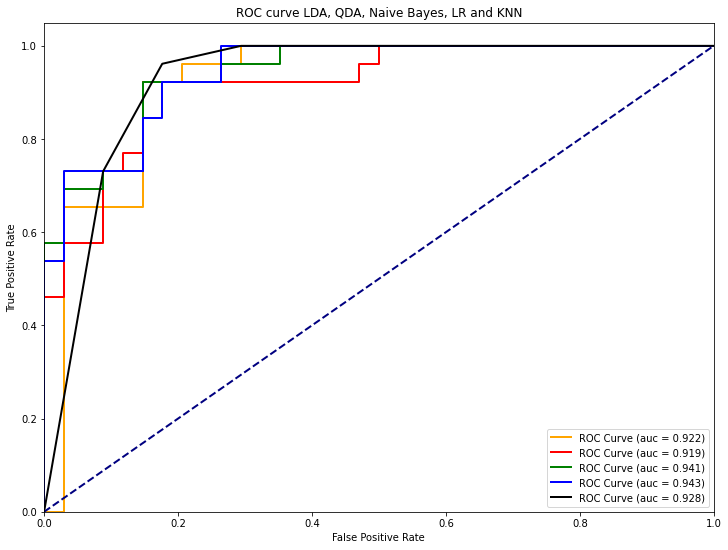

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(fpr_lda, tpr_lda, color='orange', lw=2, label='ROC Curve (auc = %0.3f)' %lda_auc)
plt.plot(fpr_qda, tpr_qda, color='red', lw=2, label='ROC Curve (auc = %0.3f)' %qda_auc)
plt.plot(fpr_gnb, tpr_gnb, color='green', lw=2, label='ROC Curve (auc = %0.3f)' %gnb_auc)
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='ROC Curve (auc = %0.3f)' %lr_auc)
plt.plot(fpr_knn, tpr_knn, color='black', lw=2, label='ROC Curve (auc = %0.3f)' %knn_auc)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel ('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.title ('ROC curve LDA, QDA, Naive Bayes, LR and KNN')
plt.legend(loc="lower right")
plt.show()